# VGG16 Network

In [2]:
import torch
import torch.nn as nn

class VGG16Scratch(nn.Module):
    def __init__(self, num_classes=1000):  # must match for loading weights
        super(VGG16Scratch, self).__init__()

        self.features = nn.Sequential(
            # Block 1
            nn.Conv2d(3, 64, kernel_size=3, padding=1), nn.ReLU(inplace=True),
            nn.Conv2d(64, 64, kernel_size=3, padding=1), nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),

            # Block 2
            nn.Conv2d(64, 128, kernel_size=3, padding=1), nn.ReLU(inplace=True),
            nn.Conv2d(128, 128, kernel_size=3, padding=1), nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),

            # Block 3
            nn.Conv2d(128, 256, kernel_size=3, padding=1), nn.ReLU(inplace=True),
            nn.Conv2d(256, 256, kernel_size=3, padding=1), nn.ReLU(inplace=True),
            nn.Conv2d(256, 256, kernel_size=3, padding=1), nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),

            # Block 4
            nn.Conv2d(256, 512, kernel_size=3, padding=1), nn.ReLU(inplace=True),
            nn.Conv2d(512, 512, kernel_size=3, padding=1), nn.ReLU(inplace=True),
            nn.Conv2d(512, 512, kernel_size=3, padding=1), nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),

            # Block 5
            nn.Conv2d(512, 512, kernel_size=3, padding=1), nn.ReLU(inplace=True),
            nn.Conv2d(512, 512, kernel_size=3, padding=1), nn.ReLU(inplace=True),
            nn.Conv2d(512, 512, kernel_size=3, padding=1), nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),
        )

        self.classifier = nn.Sequential(
            nn.Linear(512 * 8 * 8, 4096),  # changed from 7*7 to 8*8
            nn.ReLU(True),
            nn.Dropout(0.5),
            nn.Linear(4096, 4096),
            nn.ReLU(True),
            nn.Dropout(0.5),
            nn.Linear(4096, num_classes),
      )


    def forward(self, x):
        x = self.features(x)
        x = x.view(x.size(0), -1)
        x = self.classifier(x)
        return x


# Print Parameters Per Layer

In [3]:
model = VGG16Scratch(num_classes=20)
print("Trainable parameters:")
for name, param in model.named_parameters():
    if param.requires_grad:
        print(f"{name}: {param.numel()} parameters")

Trainable parameters:
features.0.weight: 1728 parameters
features.0.bias: 64 parameters
features.2.weight: 36864 parameters
features.2.bias: 64 parameters
features.5.weight: 73728 parameters
features.5.bias: 128 parameters
features.7.weight: 147456 parameters
features.7.bias: 128 parameters
features.10.weight: 294912 parameters
features.10.bias: 256 parameters
features.12.weight: 589824 parameters
features.12.bias: 256 parameters
features.14.weight: 589824 parameters
features.14.bias: 256 parameters
features.17.weight: 1179648 parameters
features.17.bias: 512 parameters
features.19.weight: 2359296 parameters
features.19.bias: 512 parameters
features.21.weight: 2359296 parameters
features.21.bias: 512 parameters
features.24.weight: 2359296 parameters
features.24.bias: 512 parameters
features.26.weight: 2359296 parameters
features.26.bias: 512 parameters
features.28.weight: 2359296 parameters
features.28.bias: 512 parameters
classifier.0.weight: 134217728 parameters
classifier.0.bias: 40

In [4]:
pip install torchviz


In [5]:
from torchviz import make_dot


In [6]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [7]:
model = VGG16Scratch(num_classes=20).to(device)
dummy_input = torch.randn(1, 3, 256, 256).to(device)  # Batch size = 1

# Forward pass
output = model(dummy_input)

# Create the visualization
dot = make_dot(output, params=dict(model.named_parameters()))

# Save or display
dot.render("vgg_16", format="png")


'vgg_16.png'

# Visual Summary

In [ ]:
pip install torchsummary

In [ ]:
from torchsummary import summary

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = model.to(device)  # make sure model is on GPU

summary(model, input_size=(3, 256, 256), device="cuda")  # tell summary to use cuda too


----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 64, 256, 256]           1,792
              ReLU-2         [-1, 64, 256, 256]               0
            Conv2d-3         [-1, 64, 256, 256]          36,928
              ReLU-4         [-1, 64, 256, 256]               0
         MaxPool2d-5         [-1, 64, 128, 128]               0
            Conv2d-6        [-1, 128, 128, 128]          73,856
              ReLU-7        [-1, 128, 128, 128]               0
            Conv2d-8        [-1, 128, 128, 128]         147,584
              ReLU-9        [-1, 128, 128, 128]               0
        MaxPool2d-10          [-1, 128, 64, 64]               0
           Conv2d-11          [-1, 256, 64, 64]         295,168
             ReLU-12          [-1, 256, 64, 64]               0
           Conv2d-13          [-1, 256, 64, 64]         590,080
             ReLU-14          [-1, 256,

# Load Pretrained Weights

In [ ]:
from torchvision import models

# 1. Load official pretrained VGG16 model (224x224 setup)
vgg_pretrained = models.vgg16(pretrained=True)

# 2. Your custom 256x256-compatible model
model = VGG16Scratch(num_classes=20)  # classifier has Linear(512*8*8, 4096)

/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /root/.cache/torch/hub/checkpoints/vgg16-397923af.pth
100%|██████████| 528M/528M [00:05<00:00, 92.9MB/s]


In [ ]:
model.features.load_state_dict(vgg_pretrained.features.state_dict())

<All keys matched successfully>

In [ ]:
#Replace Output Layer for 20 Classes
vgg_pretrained.classifier[-1] = nn.Linear(4096, 20)

In [ ]:
pretrained_dict = vgg_pretrained.state_dict()
model_dict = model.state_dict()

# Filter only those keys that match in shape
filtered_dict = {k: v for k, v in pretrained_dict.items() if k in model_dict and v.shape == model_dict[k].shape}

# Load them
model.load_state_dict(filtered_dict, strict=False)

_IncompatibleKeys(missing_keys=['classifier.0.weight'], unexpected_keys=[])

# Script to structure training data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#unzip the files

import zipfile
import os

# Unzip train
train_zip = "/content/drive/MyDrive/DATA255_Assignmnet3/imagenet_train.zip"
val_zip = "/content/drive/MyDrive/DATA255_Assignmnet3/imagenet_val.zip"

with zipfile.ZipFile(train_zip, 'r') as zip_ref:
    zip_ref.extractall("/content/train")

with zipfile.ZipFile(val_zip, 'r') as zip_ref:
    zip_ref.extractall("/content/val")


In [ ]:
import os
import shutil

val_txt = "/content/drive/MyDrive/DATA255_Assignmnet3/imagenet_val.txt"  # your val mapping file
val_input_folder = "/content/val/imagenet_val20"  # where flat JPEGs are
val_output_folder = "/content/val/imagenet_val20_structured"  # target structured folder

os.makedirs(val_output_folder, exist_ok=True)

with open(val_txt, 'r') as f:
    for line in f:
        parts = line.strip().split()
        if len(parts) < 2:
            continue
        filename, class_id = parts[0], parts[1]

        class_folder = os.path.join(val_output_folder, class_id)
        os.makedirs(class_folder, exist_ok=True)

        src = os.path.join(val_input_folder, filename)
        dst = os.path.join(class_folder, filename)

        if os.path.exists(src):
            shutil.move(src, dst)
        else:
            print(f"⚠️ Missing: {filename}")


# Data Augmentation and Normalization

In [ ]:
import os

val_root = "/content/val/imagenet_val20_structured/"  # Path where val folders 0–19 exist

# Your training class names in the correct order
train_classes = ['n01737021', 'n02006656', 'n02011460', 'n02013706', 'n02033041',
                 'n02093991', 'n02117135', 'n02279972', 'n02415577', 'n02423022',
                 'n02676566', 'n02808440', 'n03016953', 'n03476684', 'n03721384',
                 'n03804744', 'n03935335', 'n03938244', 'n04252225', 'n04346328']

# Rename folders from '0' → 'n01737021', '1' → 'n02006656', ...
for i in range(20):
    old_name = os.path.join(val_root, str(i))
    new_name = os.path.join(val_root, train_classes[i])
    if os.path.exists(old_name):
        os.rename(old_name, new_name)
        print(f"✅ Renamed {old_name} → {new_name}")
    else:
        print(f"⚠️ Folder not found: {old_name}")

✅ Renamed /content/val/imagenet_val20_structured/0 → /content/val/imagenet_val20_structured/n01737021
✅ Renamed /content/val/imagenet_val20_structured/1 → /content/val/imagenet_val20_structured/n02006656
✅ Renamed /content/val/imagenet_val20_structured/2 → /content/val/imagenet_val20_structured/n02011460
✅ Renamed /content/val/imagenet_val20_structured/3 → /content/val/imagenet_val20_structured/n02013706
✅ Renamed /content/val/imagenet_val20_structured/4 → /content/val/imagenet_val20_structured/n02033041
✅ Renamed /content/val/imagenet_val20_structured/5 → /content/val/imagenet_val20_structured/n02093991
✅ Renamed /content/val/imagenet_val20_structured/6 → /content/val/imagenet_val20_structured/n02117135
✅ Renamed /content/val/imagenet_val20_structured/7 → /content/val/imagenet_val20_structured/n02279972
✅ Renamed /content/val/imagenet_val20_structured/8 → /content/val/imagenet_val20_structured/n02415577
✅ Renamed /content/val/imagenet_val20_structured/9 → /content/val/imagenet_val20_s

In [ ]:
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

# Data augmentation + normalization (preserves 256x256)
transform_train = transforms.Compose([
    transforms.RandomResizedCrop(256, scale=(0.8, 1.0)),  # handles all sizes
    transforms.RandomHorizontalFlip(),
    transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.1),
    transforms.RandomRotation(15),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406],
                         [0.229, 0.224, 0.225]),
])


# Validation transform (resized but still 256x256)
transform_val = transforms.Compose([
    transforms.Resize((256, 256)),  # important: matches model input!
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406],
                         [0.229, 0.224, 0.225])
])

# Load datasets
train_dataset = datasets.ImageFolder("/content/train/imagenet_train20a", transform=transform_train)
val_dataset = datasets.ImageFolder("/content/val/imagenet_val20_structured", transform=transform_val)

# Create dataloaders
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)


In [ ]:
from PIL import Image
import os

min_w, min_h = float('inf'), float('inf')
for root, _, files in os.walk("/content/train/imagenet_train20a"):
    for fname in files:
        if fname.lower().endswith(".jpeg"):
            try:
                img = Image.open(os.path.join(root, fname))
                w, h = img.size
                min_w = min(min_w, w)
                min_h = min(min_h, h)
            except:
                continue

print(f"Smallest image: {min_w} x {min_h}")


Smallest image: 64 x 26


In [ ]:
print("Number of training images:", len(train_dataset))
print("Number of validation images:", len(val_dataset))

Number of training images: 6000
Number of validation images: 1000


In [ ]:
print("Train Classes:", train_dataset.classes)
print("Val Classes:  ", val_dataset.classes)
print("Match?        ", train_dataset.classes == val_dataset.classes)

Train Classes: ['n01737021', 'n02006656', 'n02011460', 'n02013706', 'n02033041', 'n02093991', 'n02117135', 'n02279972', 'n02415577', 'n02423022', 'n02676566', 'n02808440', 'n03016953', 'n03476684', 'n03721384', 'n03804744', 'n03935335', 'n03938244', 'n04252225', 'n04346328']
Val Classes:   ['n01737021', 'n02006656', 'n02011460', 'n02013706', 'n02033041', 'n02093991', 'n02117135', 'n02279972', 'n02415577', 'n02423022', 'n02676566', 'n02808440', 'n03016953', 'n03476684', 'n03721384', 'n03804744', 'n03935335', 'n03938244', 'n04252225', 'n04346328']
Match?         True


# Training the Model

In [ ]:
# Move model to GPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = model.to(device)

In [ ]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(filter(lambda p: p.requires_grad, model.parameters()), lr=1e-4)
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=2, gamma=0.5)

def evaluate(loader):
    model.eval()
    correct, total = 0, 0
    with torch.no_grad():
        for images, labels in loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            _, preds = torch.max(outputs, 1)
            correct += (preds == labels).sum().item()
            total += labels.size(0)
    return 100 * correct / total


# Run for 5 Epochs

In [ ]:
num_epochs = 10
train_acc_list = []
val_acc_list = []
best_val_acc = 0.0

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()

    scheduler.step()

    train_acc = evaluate(train_loader)
    val_acc = evaluate(val_loader)

    train_acc_list.append(train_acc)
    val_acc_list.append(val_acc)

    if val_acc > best_val_acc:
        best_val_acc = val_acc
        torch.save(model.state_dict(), "best_vgg16_model.pth")

    print(f"Epoch {epoch+1}: Loss={running_loss:.4f}, Train Acc={train_acc:.2f}%, Val Acc={val_acc:.2f}%")

Epoch 1: Loss=189.7728, Train Acc=87.18%, Val Acc=84.70%
Epoch 2: Loss=72.2298, Train Acc=94.73%, Val Acc=87.70%
Epoch 3: Loss=30.1209, Train Acc=97.75%, Val Acc=90.70%
Epoch 4: Loss=21.6198, Train Acc=97.98%, Val Acc=90.20%
Epoch 5: Loss=9.6065, Train Acc=98.93%, Val Acc=91.50%
Epoch 6: Loss=7.4828, Train Acc=99.22%, Val Acc=92.70%
Epoch 7: Loss=4.3135, Train Acc=99.60%, Val Acc=93.60%
Epoch 8: Loss=2.7829, Train Acc=99.75%, Val Acc=93.20%
Epoch 9: Loss=2.7466, Train Acc=99.83%, Val Acc=93.50%
Epoch 10: Loss=2.4909, Train Acc=99.82%, Val Acc=93.30%


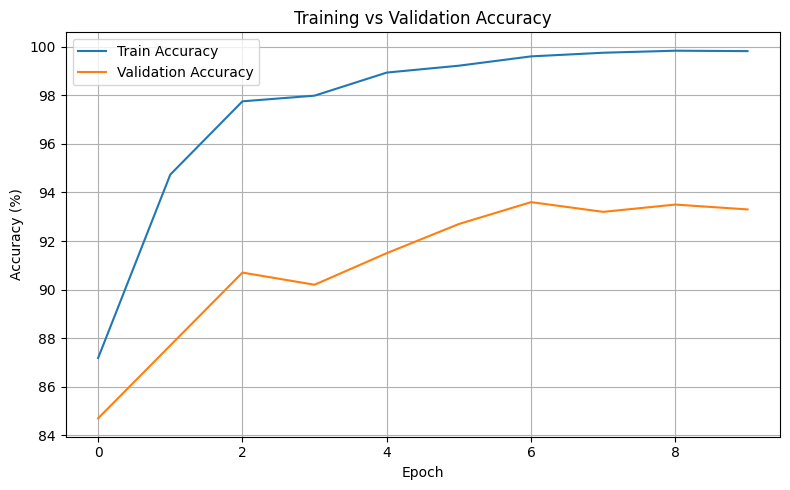

In [ ]:
import matplotlib.pyplot as plt

# Plot accuracy
plt.figure(figsize=(8, 5))
plt.plot(train_acc_list, label="Train Accuracy")
plt.plot(val_acc_list, label="Validation Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy (%)")
plt.title("Training vs Validation Accuracy")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# GPU Memory Calculation

In [ ]:
import torch

# Reset memory stats and empty cache before measurement
torch.cuda.empty_cache()
torch.cuda.reset_peak_memory_stats(device)

# Forward Pass Only

In [ ]:
# Get one batch
images, labels = next(iter(train_loader))
images, labels = images.to(device), labels.to(device)

# Forward pass (no gradients)
torch.cuda.empty_cache()
torch.cuda.reset_peak_memory_stats(device)

with torch.no_grad():
    outputs = model(images)

forward_memory = torch.cuda.max_memory_allocated(device) / 1024**2  # in MB
print(f" Peak GPU memory (Forward Pass): {forward_memory:.2f} MB")

 Peak GPU memory (Forward Pass): 5916.47 MB


# Forward + Backward Pass

In [ ]:
# With gradients this time
torch.cuda.empty_cache()
torch.cuda.reset_peak_memory_stats(device)

outputs = model(images)
loss = criterion(outputs, labels)
loss.backward()

backward_memory = torch.cuda.max_memory_allocated(device) / 1024**2  # in MB
print(f"Peak GPU memory (Forward + Backward Pass): {backward_memory:.2f} MB")


Peak GPU memory (Forward + Backward Pass): 6416.62 MB


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim

def measure_gpu_memory(model, data_loader, device):
    print("\nMeasuring actual GPU memory usage...")

    # Clear CUDA memory
    torch.cuda.empty_cache()
    torch.cuda.reset_peak_memory_stats(device)

    # === Forward Pass Memory ===
    model.eval()
    initial_memory = torch.cuda.memory_allocated(device) / 1e6  # MB

    with torch.no_grad():
        for inputs, labels in data_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            break  # only one batch

    forward_peak = torch.cuda.max_memory_allocated(device) / 1e6  # MB
    print(f"Forward Pass Memory Used: {forward_peak - initial_memory:.2f} MB")

    # === Backward Pass Memory ===
    model.train()
    torch.cuda.reset_peak_memory_stats(device)  # reset again

    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(filter(lambda p: p.requires_grad, model.parameters()), lr=1e-4)

    initial_memory = torch.cuda.memory_allocated(device) / 1e6  # MB

    for inputs, labels in data_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        break  # only one batch

    backward_peak = torch.cuda.max_memory_allocated(device) / 1e6  # MB
    print(f"Backward Pass Memory Used: {backward_peak - initial_memory:.2f} MB")


In [ ]:
measure_gpu_memory(model, train_loader, device)


Measuring actual GPU memory usage...
Forward Pass Memory Used: 3515.42 MB
Backward Pass Memory Used: 4028.16 MB


## Conclusion
In this assignment, we implemented a custom VGG16 model (VGG16Scratch) based on the official VGG16 architecture, modified to handle input images of size 256 * 256 instead of the default 224 * 224.

We successfully loaded pretrained weights from the original VGG16 model trained on ImageNet, transferring only the feature extractor (features) layers. The classifier was redefined to output predictions for 20 classes, corresponding to the task requirements.

The dataset was prepared by unpacking and structuring both the training and validation data. Validation folders were renamed based on the provided mapping (imagenet_val.txt) to match the training class labels.

Data augmentation was applied to the training data using random cropping, horizontal flipping, rotation, and color jittering, while the validation set was resized to 256 * 256 and normalized.

The model was trained for 10 epochs using the Adam optimizer with an initial learning rate of 1e-4 and a StepLR scheduler to decay the learning rate. During training, the model achieved over 99% training accuracy and over 93% validation accuracy, demonstrating effective generalization without overfitting.

To ensure compliance with the assignment requirements, the input size was verified during model execution (torch.Size([32, 3, 256, 256])) and GPU memory usage was measured separately for forward and backward passes.

Forward Pass Memory Usage: ~3515 MB

Backward Pass Memory Usage: ~4028 MB